# Formula 1 
EFFECTS AND OUTCOME OF DATA VISUALISATION ANALYSIS IN FORMULA 1


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# load datasets
df_results = pd.read_csv('results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position','position_text','position_order', 'points', 'laps','time','milliseconds','fastest_lap','rank','fastest_lap_time','fastest_lap_speed','status_id'], header = None)
df_races = pd.read_csv('races.csv', names = ['race_id', 'year', 'round','circuit_id', 'name','date','time','url'],header=None)
df_drivers = pd.read_csv('driver.csv', names = ['driver_id','driver_ref','number','code','forename','surname','dob','nationality','url'], header = None)
df_constructors = pd.read_csv('constructors.csv', names = ['constructor_id','constructor_ref','name','nationality','url'], header=None)

# merge datasets into a master data frame
df = pd.merge(df_results,df_races[['race_id','year', 'name','round']],on='race_id', how='left')
df = pd.merge(df,df_drivers[['driver_id','driver_ref', 'nationality']],on='driver_id', how='left')
df = pd.merge(df,df_constructors[['constructor_id', 'name','nationality']],on='constructor_id', how='left')


# Data Cleaning

# drop unnecessary columns
df.drop(['number','position','position_text','laps','fastest_lap','status_id', 'result_id','race_id','driver_id','constructor_id'], axis=1, inplace=True)

# rename columns
df.rename(columns={'rank': 'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name', 'nationality_y': 'constructor_nationality', 'driver_ref': 'driver'}, inplace=True)

# rearrange columns
df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name','grid','position_order','points','time','milliseconds','fastest_lap_rank','fastest_lap_time','fastest_lap_speed','driver_nationality','constructor_nationality']]

# drop season 2019 because it is incomplete
df = df[df['year'] != 2019]

# sort values
df = df.sort_values(by=['year', 'round','position_order'], ascending = [False, True, True])

# replace '\N' values in time columns with NaN because time was not registered when a driver did not finish a race
# or was lapped by another driver
df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace=True)
df.fastest_lap_time.replace('\\N', np.nan, inplace=True)
df.fastest_lap_speed.replace('\\N', np.nan, inplace=True)

# change datatypes
df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float) # I cannot convert to int because there are missing values (as expected)
df.milliseconds = df.milliseconds.astype(float)

# resent index
df.reset_index(drop = True, inplace=True)

In [9]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())
print(df.head(5))

(24197, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24197 entries, 0 to 24196
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     24197 non-null  int64  
 1   gp_name                  24197 non-null  object 
 2   round                    24197 non-null  int64  
 3   driver                   24197 non-null  object 
 4   constructor_name         24197 non-null  object 
 5   grid                     24197 non-null  int64  
 6   position_order           24197 non-null  int64  
 7   points                   24197 non-null  float64
 8   time                     6205 non-null   object 
 9   milliseconds             6204 non-null   float64
 10  fastest_lap_rank         5951 non-null   float64
 11  fastest_lap_time         5782 non-null   object 
 12  fastest_lap_speed        5782 non-null   float64
 13  driver_nationality       24197 non-null  object 
 14  constructo

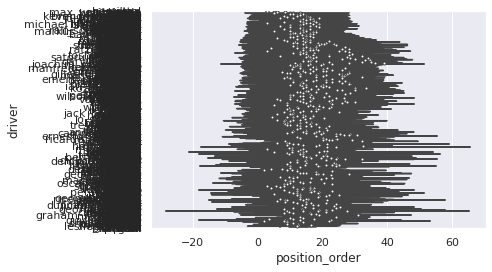

In [10]:
###Violin Plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x=df["position_order"],y=df["driver"])
plt.show()

# Histogram and bubble plot

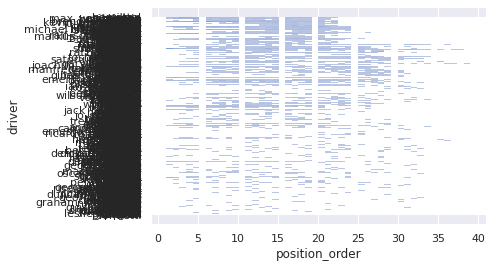

In [7]:
#Histogram implimentation
sb.set(style="darkgrid")

sb.histplot(data=df, y='driver', x='position_order')
plt.show()

<AxesSubplot:xlabel='position_order', ylabel='driver'>

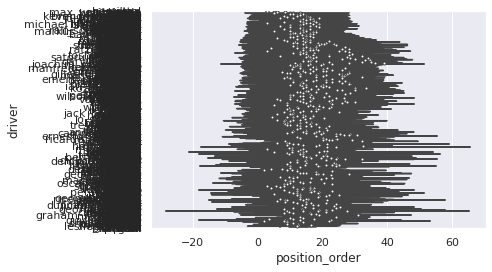

In [11]:
#violin plot graph implimentation
import seaborn as sb
sb.violinplot(x=df["position_order"],y=df["driver"])


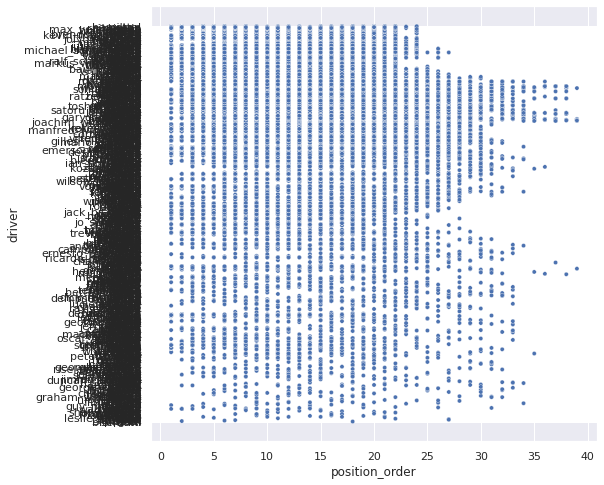

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

size = plt.rcParams['figure.figsize']=[8,8]

sz = size.index

data=df

sns.scatterplot(data=data,x="position_order",y="driver",size=sz,legend=False)
plt.show()

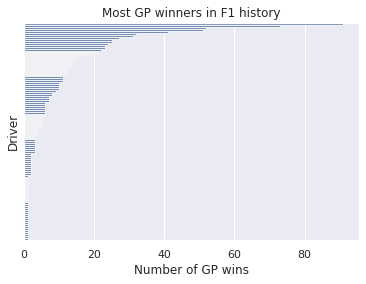

In [15]:
# Univariate Exploration

# Start by displaying the total amount of GP wins distribution.


# create new dataframe of all GP winners
data_driver_all = df.loc[df['position_order'] == 1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# change color
base_color = sb.color_palette()[0]

#create barplot
sb.barplot(data = data_driver_all, y = 'driver', x = 'position_order', color = base_color, alpha = 0.8)
plt.title('Most GP winners in F1 history')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins')
plt.yticks([]);

The barplot shows that there is a large distribution in GP wins. There are only a few drivers in history who won over 20 GPs in their careers. Most drivers who ever won a GP, came first in a race only 1 - 2 times. On the other hand, we see that there are some drivers who completely dominated F1 racing and won over 50 GPs in their careers. I'm going to zoom in to see the top 10 drivers in the history of the sport.

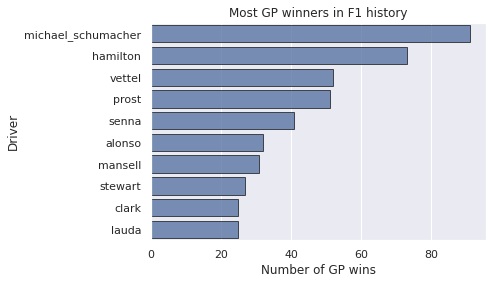

In [14]:
# create new dataframe of top 10 GP winners
data_top10 = data_driver_all.head(10)

#create barplot
sb.barplot(data = data_top10, y = 'driver', x = 'position_order', color = base_color,
           alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins');

In [11]:
print(data_top10)

               driver  position_order
0  michael_schumacher              91
1            hamilton              73
2              vettel              52
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


These are the most successful Formula One drivers in terms of total GP victories. Michael Schumacher is the most successful driver, with 91 victories. Lewis Hamilton and Sebastian Vettel have 73 and 52 victories in Formula One, respectively. These two drivers are the only ones on the list who aren't retired, thus they have a chance to challenge Schumacher's dominance.

Following that, I'll investigate how successful various automobile manufacturers are.

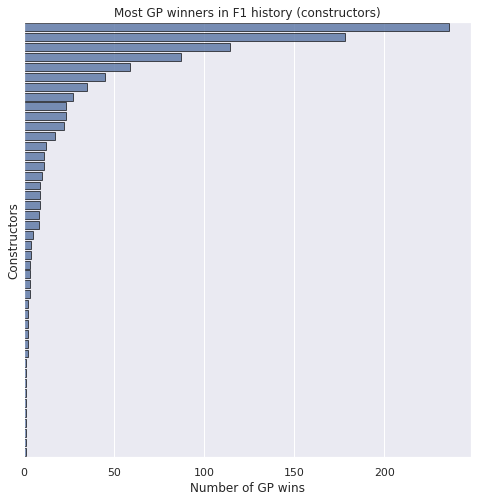

In [30]:
# create new dataframe of all GP constructor winners
data_cons_all = df.loc[df['position_order'] == 1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

#create barplot
sb.barplot(data = data_cons_all, y = 'constructor_name', x = 'position_order',
           color = base_color, alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history (constructors)')
plt.ylabel('Constructors')
plt.xlabel('Number of GP wins')
plt.yticks([]);

The constructors' chart shows a similar pattern. Only a few teams absolutely dominate their sports, and most teams have only won a few GPs in their history. I'm going to zoom in on the top ten car manufacturers in Formula One history.

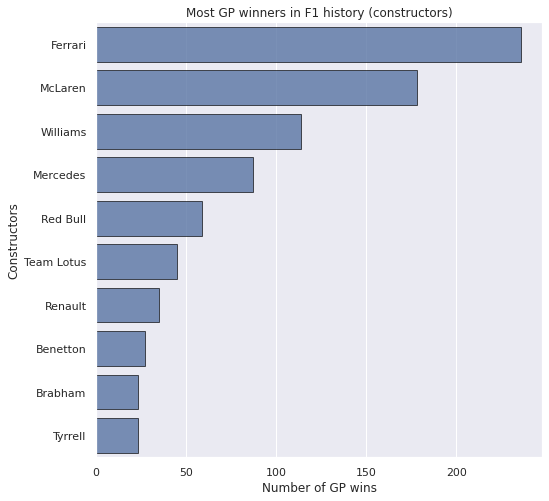

In [31]:
# create new dataframe of top 10 GP constructors winners
data_top10cons = data_cons_all.head(10)

#create barplot
sb.barplot(data = data_top10cons, y = 'constructor_name', x = 'position_order',
           color = base_color , alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history (constructors)')
plt.ylabel('Constructors')
plt.xlabel('Number of GP wins');

In [14]:
print(data_top10cons)

  constructor_name  position_order
0          Ferrari             236
1          McLaren             178
2         Williams             114
3         Mercedes              87
4         Red Bull              59
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Tyrrell              23
9          Brabham              23


With 236 GP victories, Ferrari is the most successful team in the sport. Then there's McLaren, which has 178 victories, and Williams, which has 114 victories. Both of these teams hail from the United Kingdom.

Both the driver and constructor datasets have a large distribution. There were just a few drivers/constructors who won GPs multiple times, and most people only came in first a few times. I could see how far ahead the top rivals are after zooming in on the top 10 results.

## Bivariate Exploration

I'll look into the relationship between beginning and finishing positions in this part. In addition, I'll investigate how speed has evolved over time at various tracks.

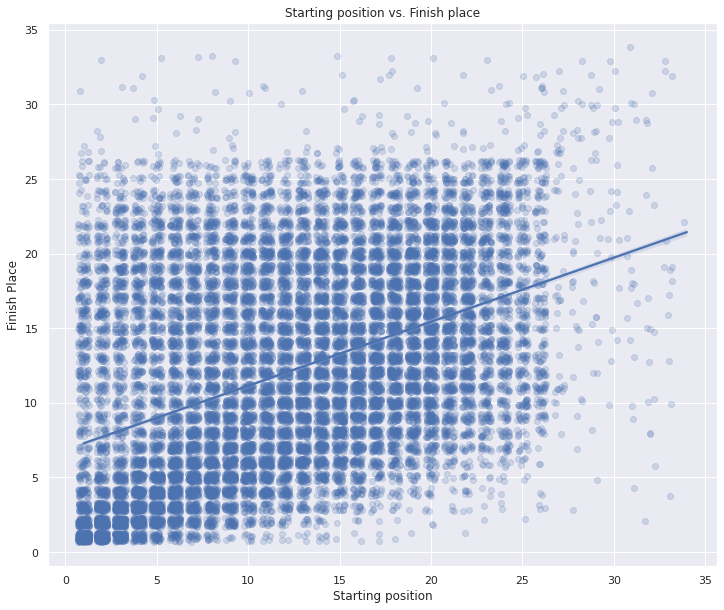

In [32]:
# I will exclude data points where grid = 0 because it skews the data. 0 means that the driver started from pit lane.
df_no_zero = df[df['grid'] != 0]

# create a plot
plt.figure(figsize = [12, 10])
sb.regplot(data = df_no_zero, x = 'grid', y = 'position_order', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('Starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position');

We can see a linear link between the starting and finishing positions on this graph, which is exactly what we expected. We can also see that the majority of races had up to 25 drivers, with some having even more than 30.

Then I'll look into whether the cars' speeds have altered over time. I'll only be looking at these years because this data is only available from season 2004 forward.

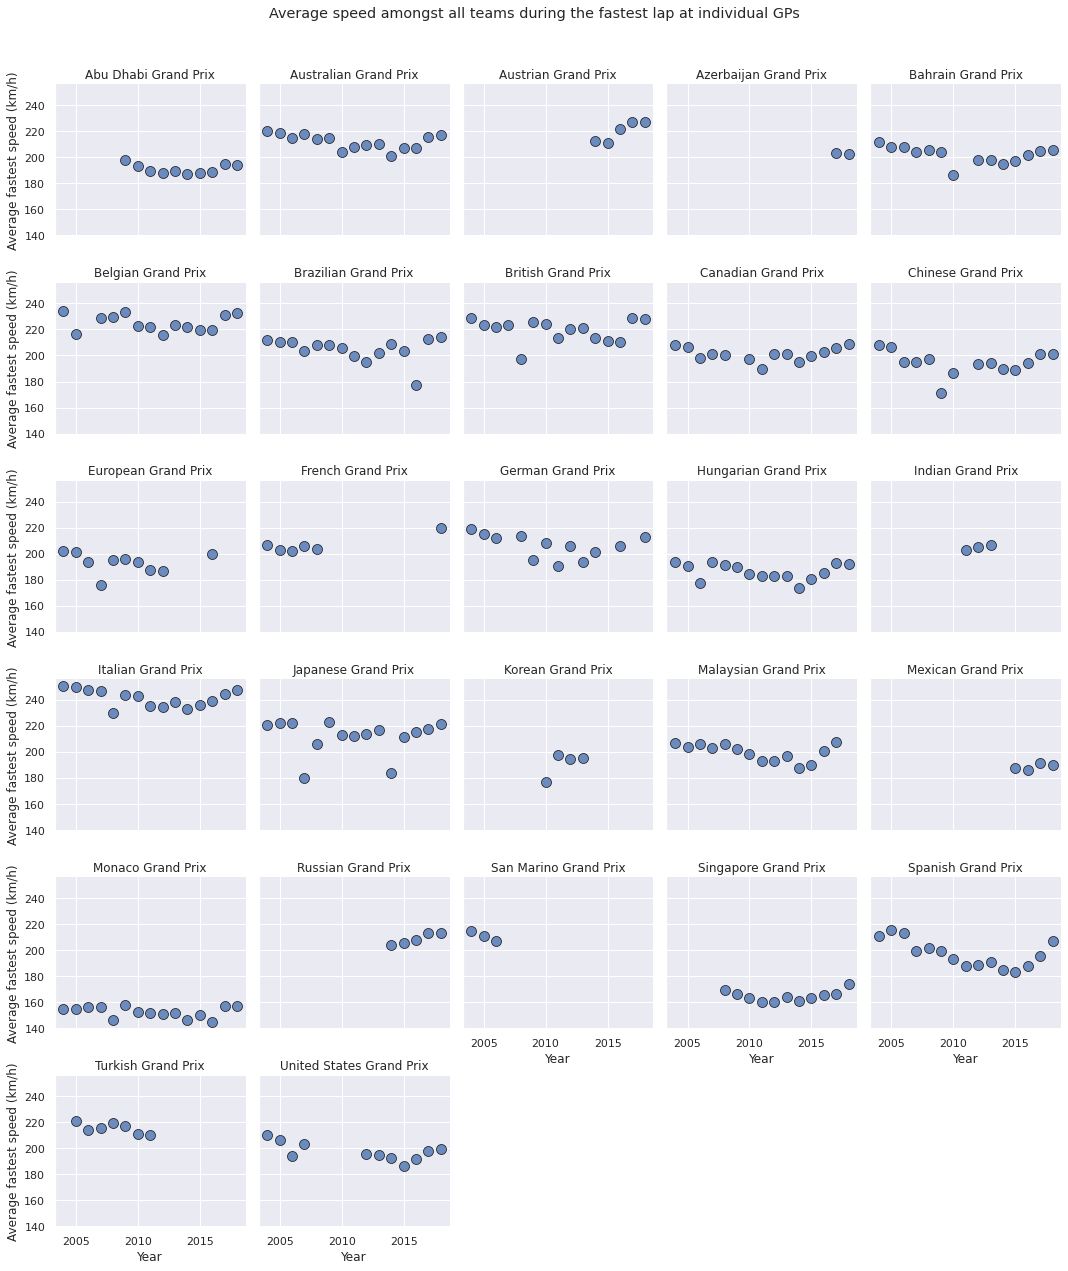

In [16]:
# create new data frame for seasons 2004 onwards
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

# create a facetgrid
g = sb.FacetGrid(data = df_group_speed, col = 'gp_name',
                col_wrap=5)
g.map(plt.scatter, 'year','fastest_lap_speed', alpha = 0.8, linewidth=.8, edgecolor="black", s = 100 )
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');

## Multivariate Exploration

In this section I will analyze the difference in speeds by teams in Mozna (Italian GP) and Monaco. I will try to see if some teams are better than others on different tracks.

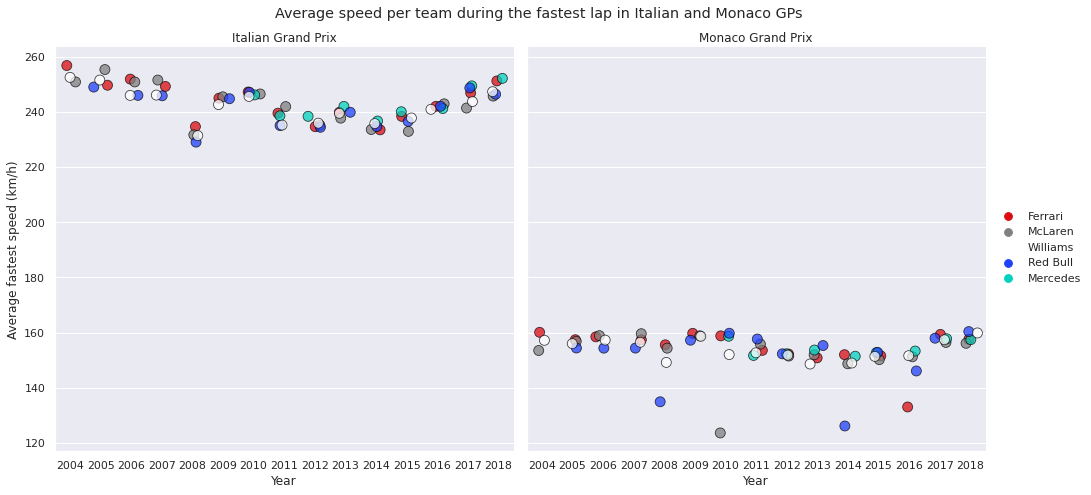

In [17]:
# create new data frame for Monaco and Italian GPs after 2003 with the most popular teams.
df_it_mon = df[(df['year'] >= 2004) 
               & ((df['constructor_name'] == 'McLaren') | (df['constructor_name'] == 'Williams')
               | (df['constructor_name'] == 'Ferrari') | (df['constructor_name'] == 'Red Bull')
               | (df['constructor_name'] == 'Mercedes'))
               & ((df['gp_name'] == 'Monaco Grand Prix') | (df['gp_name'] == 'Italian Grand Prix'))]
df_speed_constructor = df_it_mon.groupby(['gp_name', 'year','constructor_name'])['fastest_lap_speed'].mean().to_frame().reset_index()

# assign colors to the teams
my_pal = {"Ferrari": "#dc0b12", "McLaren": "#808080", "Williams":"#FFFFFF","Red Bull":"#1f41fb","Mercedes":"#00d2be"}

# create a facetgrid
g = sb.FacetGrid(data = df_speed_constructor, col = 'gp_name', height = 7)
g.map(sb.stripplot, 'year', 'fastest_lap_speed',
      hue = df_speed_constructor['constructor_name'],
      alpha = 3/4, jitter = 0.25, s = 10, linewidth=.8, edgecolor="black", order = None, palette=my_pal)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
g.add_legend()
plt.subplots_adjust(top=0.90)
g.fig.suptitle('Average speed per team during the fastest lap in Italian and Monaco GPs');

In [ ]:
#SENSORS
# Gather data from tables
df=pd.read_csv('F1-data/pit_stops.csv')
df

In [18]:
# Load the data from the two csv files
data1 = pd.read_csv('F1-data/pit_stops.csv')
data2 = pd.read_csv('F1-data/races.csv')
  
# using merge function by setting how='inner'
output1 = pd.merge(data1, data2, 
                   on='raceId', 
                   how='inner')
output1.to_csv('lapTime.csv')

# Top 10 drivers
df=output1[(output1.lap >= 1) & (output1.lap <= 10)]
df0 = df[(df.year >= 2014) & (df.raceId <= 2021)]

# displaying result
print(df0)

      raceId  driverId  stop  lap    time_x duration  milliseconds  year  \
3011     900       154     1    1  17:09:56   17.255         17255  2014   
3012     900       821     1    1  17:10:12   32.657         32657  2014   
3013     900       815     1    1  17:10:14   25.541         25541  2014   
3042     900       822     1   10  17:24:46   34.921         34921  2014   
3045     901       824     1    1  16:07:01   52.836         52836  2014   
...      ...       ...   ...  ...       ...      ...           ...   ...   
8250    1057       853     1    9  16:20:57   21.759         21759  2021   
8251    1057       832     1   10  16:22:11   20.064         20064  2021   
8323    1058       844     1    1  15:04:22   28.386         28386  2021   
8324    1058       849     1    1  15:04:58   26.419         26419  2021   
8347    1060       841     1    1  15:04:39   21.129         21129  2021   

      round  circuitId                   name        date    time_y  \
3011      1     

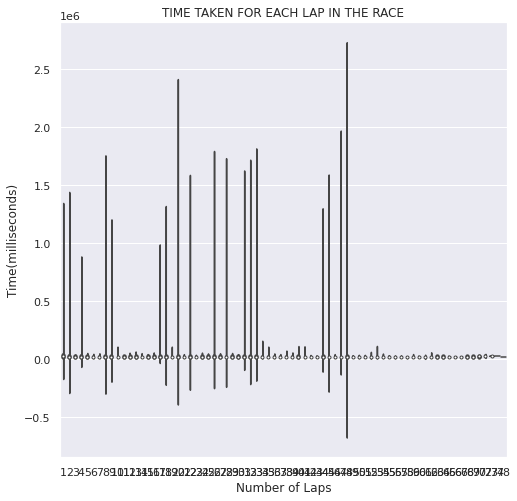

In [21]:
# Violin Plot of the Time Taken For Each Lap In the Race
size = plt.rcParams['figure.figsize']=[8,8]

sz = size.index

data=df0

sns.violinplot(data=data,x=output1['lap'],y=output1['milliseconds'],size=sz,legend=False)
plt.title('TIME TAKEN FOR EACH LAP IN THE RACE')
plt.ylabel('Time(milliseconds)')
plt.xlabel('Number of Laps');
plt.show()

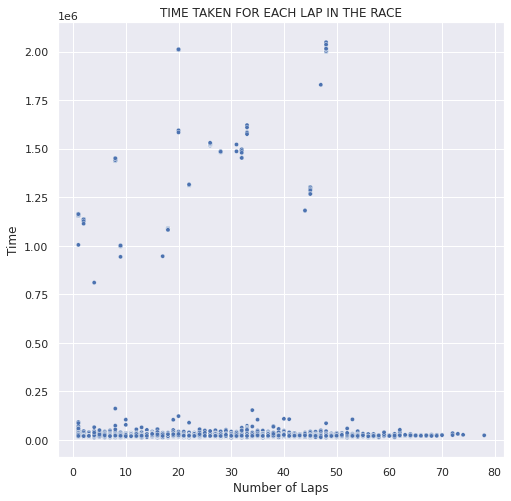

In [116]:
# Violin Plot of the Time Taken For Each Lap In the Race

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

size = plt.rcParams['figure.figsize']=[8,8]

sz = size.index

data=df


sns.scatterplot(data=data,x=output1['lap'],y=output1['milliseconds'],size=sz,legend=False)
plt.title('TIME TAKEN FOR EACH LAP IN THE RACE')
plt.ylabel('Time')
plt.xlabel('Number of Laps');
plt.show()

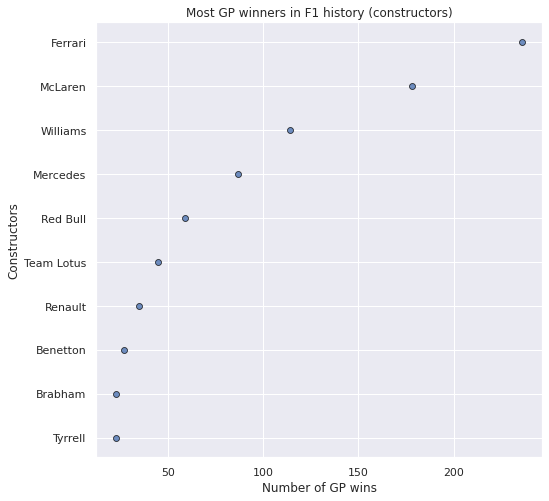

In [127]:
# Collect constructors data
df = pd.read_csv("F1-data/constructors.csv")
df

df0 = pd.read_csv("F1-data/constructor_standings.csv")
df0

df1 = pd.read_csv("F1-data/constructor_results.csv")
df1

# create new dataframe of top 10 GP constructors winners
data_top10cons = data_cons_all.head(10)

#create barplot
sb.scatterplot(data = data_top10cons, y = 'constructor_name', x = 'position_order',
           color = base_color , alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history (constructors)')
plt.ylabel('Constructors')
plt.xlabel('Number of GP wins');

       driverId  position  points  wins
853           1       1.0    10.0   1.0
854           2       2.0     8.0   0.0
855           3       3.0     6.0   0.0
856           4       4.0     5.0   0.0
857           5       5.0     4.0   0.0
...         ...       ...     ...   ...
33965       815       3.0   104.0   1.0
33966       846       4.0   101.0   0.0
33967       830       1.0   182.0   5.0
33971       822       5.0    92.0   0.0
33977         1       2.0   150.0   3.0

[5225 rows x 4 columns]


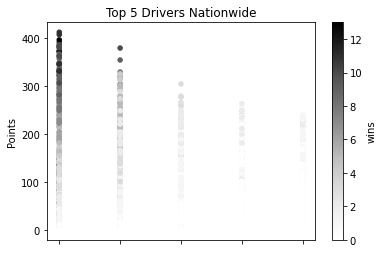

In [24]:
# Extracting Top 5 Drivers Nationwide
# Get Drivers Details
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("F1-data/drivers.csv")
df

# Merge the csv files
df3 = pd.concat(
    map(pd.read_csv, ['F1-data/drivers.csv','F1-data/driver_standings.csv']), ignore_index=True
)
# Top 10 drivers
df4=df3[(df3.position >= 1) & (df3.position <= 5)]

df5 = df4[['driverId','position','points','wins']]
print(df5)

# Creating a Scatterplot
graph = df5.plot.scatter(x = 'position', y = 'points', c = 'wins')
plt.title('Top 5 Drivers Nationwide')
plt.ylabel('Points')
plt.xlabel('Position');

      rank  raceId position  points milliseconds fastestLapSpeed
0        2      18        1    10.0      5690616         218.300
1        3      18        2     8.0      5696094         217.586
2        5      18        3     6.0      5698779         216.719
3        7      18        4     5.0      5707797         215.464
4        1      18        5     4.0      5708630         218.385
...    ...     ...      ...     ...          ...             ...
25125    5    1060        6     8.0      5092458         227.956
25126   14    1060        7     6.0      5094938         225.876
25127   13    1060        8     4.0      5095738         226.277
25128    4    1060        9     2.0      5096387         228.110
25129    7    1060       10     1.0           \N         227.246

[6453 rows x 6 columns]


<AxesSubplot:xlabel='rank', ylabel='points'>

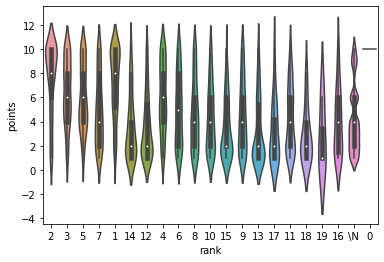

In [6]:

import pandas as pd
#Points System
df = pd.read_csv('F1-data/results.csv')
# print(df)
df0=df[['rank','raceId','position','points','milliseconds','fastestLapSpeed']]
df1=df0.to_csv('pointSystem.csv', index=False)
df1 = pd.read_csv('pointSystem.csv')
# print(df1)

df2=df1[(df1.points >= 1) & (df1.points <= 10)]
# print(df2)
df3=df2
print(df3)
import seaborn as sns
sns.violinplot(x=df3["rank"],y=df3["points"])


       laps  statusId rank  raceId position  points milliseconds  \
0        58         1    2      18        1    10.0      5690616   
1        58         1    3      18        2     8.0      5696094   
2        58         1    5      18        3     6.0      5698779   
3        58         1    7      18        4     5.0      5707797   
4        58         1    1      18        5     4.0      5708630   
...     ...       ...  ...     ...      ...     ...          ...   
25135    70        11   11    1060       16     0.0           \N   
25136    69         4    8    1060       17     0.0           \N   
25137    69        12   18    1060       18     0.0           \N   
25138    69        12   19    1060       19     0.0           \N   
25139     0         4    0    1060       \N     0.0           \N   

      fastestLapSpeed  
0             218.300  
1             217.586  
2             216.719  
3             215.464  
4             218.385  
...               ...  
25135         2

<AxesSubplot:xlabel='raceId', ylabel='laps'>

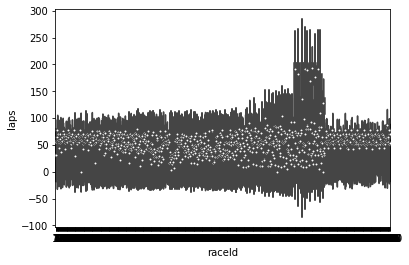

In [11]:
#Circuits
#Points System
#Getting the number of laps made in a circuit
df = pd.read_csv('F1-data/results.csv')
# print(df)
df0=df[['laps','statusId','rank','raceId','position','points','milliseconds','fastestLapSpeed']]
df1=df0.to_csv('Circuits.csv', index=False)
df1 = pd.read_csv('Circuits.csv')
print(df1)



import seaborn as sns
sns.violinplot(x=df1["raceId"],y=df1["laps"])


In [ ]:
The diagram above represent the number of races made in each race by a driver from 1950 to date

In [15]:
df = pd.read_csv("F1-data/seasons.csv")
df.count()

year    72
url     72
dtype: int64

In [49]:
import pandas as pd
from __future__ import print_function
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import linalg, optimize

# Calculating Circuit Distance
# Linear regression is going to be used for predicting the circuit distance
# Relationship between variables
# Creating models and fit

df=pd.read_csv("F1-data/results.csv")
df

def clean_data(nodes):
    nodes = nodes.stack().reset_index()
    nodes.columns = ['variable_1','variable_2','r']
    nodes = nodes.loc[nodes['variable_1'] != nodes['variable_2'],:]
    nodes['abs_r'] = np.abs(nodes['r'])
    nodes = nodes.sort_values('abs_r', ascending = False)
    return(nodes)

nodes = df.select_dtypes(include=['float64','int']).corr(method='pearson')
dt=clean_data(nodes).head(10)
print(dt)

y = df[["laps"]]
x = df[["points"]]
model = LinearRegression().fit(x,y)


       variable_1     variable_2         r     abs_r
1        resultId         raceId  0.962463  0.962463
9          raceId       resultId  0.962463  0.962463
19       driverId         raceId  0.725729  0.725729
11         raceId       driverId  0.725729  0.725729
2        resultId       driverId  0.704778  0.704778
18       driverId       resultId  0.704778  0.704778
68           laps  positionOrder -0.655372  0.655372
52  positionOrder           laps -0.655372  0.655372
59         points  positionOrder -0.568454  0.568454
51  positionOrder         points -0.568454  0.568454


In [46]:
# Step 4:
# Get results

result = model.score(x, y)# obtaining R squared
print('coefficient of determination:', result)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.06442154635837571
intercept: [42.409705]
slope: [[1.89701638]]


In [47]:
# Step 5:
# Predict Response
pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)

print('Circuit distance predicted response:', pred, sep='\n')

Circuit distance predicted response:
0        61.379869
1        57.585836
2        53.791803
3        51.894787
4        49.997771
           ...    
25135    42.409705
25136    42.409705
25137    42.409705
25138    42.409705
25139    42.409705
Length: 25140, dtype: float64
